In [107]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [57]:
data = pd.read_csv('HR.csv')

In [58]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [59]:
#2 Задание
#Среднее
data[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company']].mean()

satisfaction_level        0.612834
last_evaluation           0.716102
number_project            3.803054
average_montly_hours    201.050337
time_spend_company        3.498233
dtype: float64

In [60]:
#Медиана
data[['satisfaction_level', 'last_evaluation', 'number_project','average_montly_hours', 'time_spend_company']].median()

satisfaction_level        0.64
last_evaluation           0.72
number_project            4.00
average_montly_hours    200.00
time_spend_company        3.00
dtype: float64

In [61]:
#Мода
data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
0,0.1,0.55,4.0,135,3.0
1,NaN,NaN,NaN,156,NaN


In [62]:
#Минимальные значения
data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].min()

satisfaction_level       0.09
last_evaluation          0.36
number_project           2.00
average_montly_hours    96.00
time_spend_company       2.00
dtype: float64

In [63]:
#Максимальные значения
data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].max()

satisfaction_level        1.0
last_evaluation           1.0
number_project            7.0
average_montly_hours    310.0
time_spend_company       10.0
dtype: float64

In [64]:
#Среднее отклонение
data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].std()

satisfaction_level       0.248631
last_evaluation          0.171169
number_project           1.232592
average_montly_hours    49.943099
time_spend_company       1.460136
dtype: float64

In [65]:
perem = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()
print(perem)

                      satisfaction_level  last_evaluation  number_project  \
satisfaction_level              1.000000         0.105021       -0.142970   
last_evaluation                 0.105021         1.000000        0.349333   
number_project                 -0.142970         0.349333        1.000000   
average_montly_hours           -0.020048         0.339742        0.417211   
time_spend_company             -0.100866         0.131591        0.196786   

                      average_montly_hours  time_spend_company  
satisfaction_level               -0.020048           -0.100866  
last_evaluation                   0.339742            0.131591  
number_project                    0.417211            0.196786  
average_montly_hours              1.000000            0.127755  
time_spend_company                0.127755            1.000000  


<AxesSubplot:>

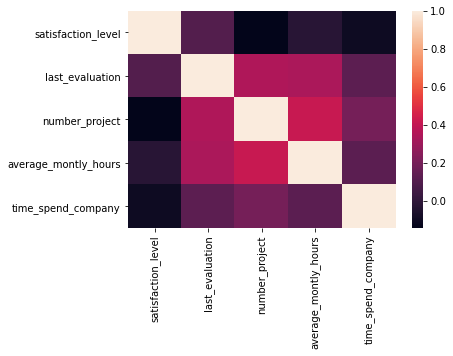

In [66]:
perem = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']].corr()
sns.heatmap(perem,
            xticklabels=perem.columns.values,
            yticklabels=perem.columns.values)

In [67]:
#Очень странно, но две наименее скоррелированые переменные, это satisfaction_level - number_project
#Самые две скоррелированные переменные это average_montly_hours - number_project, что крайне логично

In [68]:
#Для того чтобы (грамотно!) выполнить 3 задание надо создать новый датафрейм исключающий уволившихся сотрудников

In [69]:
data_not_left = data.loc[data['left'] != 1]

In [70]:
data_not_left['left'].value_counts()

0    11428
Name: left, dtype: int64

In [71]:
data_not_left['department'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

In [72]:
# В 5 задании аналогично беру сотрудников работающих в данный момент времени

<AxesSubplot:>

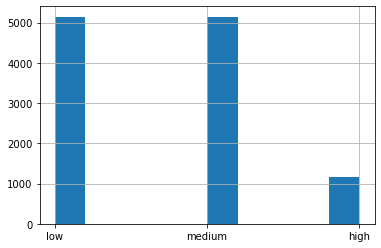

In [73]:
data_not_left['salary'].hist()

In [74]:
#6 задание 

In [75]:
#Теперь мы знаем какие департаменты есть
data_not_left['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'RandD', 'marketing'], dtype=object)

In [76]:
data_sales = data_not_left.loc[data['department'] == 'sales']

<AxesSubplot:>

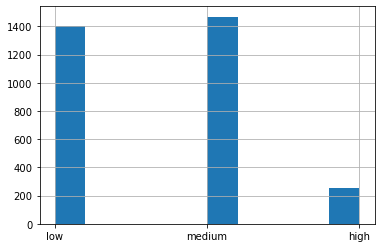

In [77]:
data_sales['salary'].hist()

In [78]:
data_accounting = data_not_left.loc[data['department'] == 'accounting']

In [79]:
data_accounting['department'].unique()

array(['accounting'], dtype=object)

<AxesSubplot:>

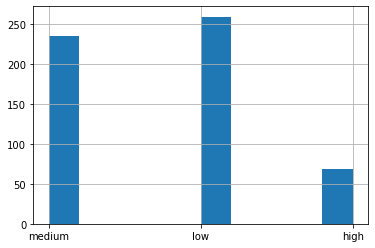

In [80]:
data_accounting['salary'].hist()

In [81]:
data_hr = data_not_left.loc[data['department'] == 'hr']

In [82]:
data_hr['department'].unique()

array(['hr'], dtype=object)

<AxesSubplot:>

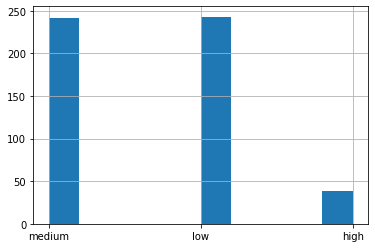

In [83]:
data_hr['salary'].hist()

In [84]:
data_technical = data_not_left.loc[data['department'] == 'technical']

In [85]:
data_technical['department'].unique()

array(['technical'], dtype=object)

<AxesSubplot:>

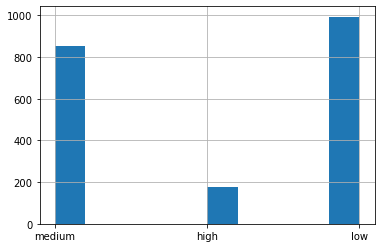

In [86]:
# Простите, но почему технарям так мало платят!?
data_technical['salary'].hist()

In [87]:
data_support = data_not_left.loc[data['department'] == 'support']

In [88]:
data_support['department'].unique()

array(['support'], dtype=object)

<AxesSubplot:>

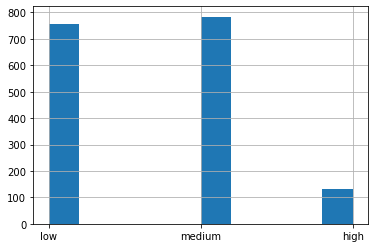

In [89]:
data_support['salary'].hist()

In [90]:
data_managment = data_not_left.loc[data['department'] == 'management']

In [91]:
data_managment['department'].unique()

array(['management'], dtype=object)

<AxesSubplot:>

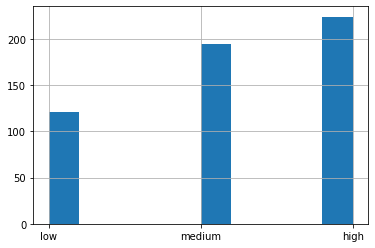

In [92]:
data_managment['salary'].hist()

In [93]:
data_it = data_not_left.loc[data['department'] == 'IT']

<AxesSubplot:>

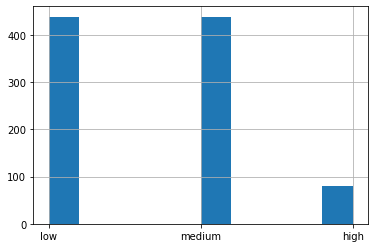

In [94]:
data_it['salary'].hist()

In [95]:
data_product_mng = data_not_left.loc[data['department'] == 'product_mng']

<AxesSubplot:>

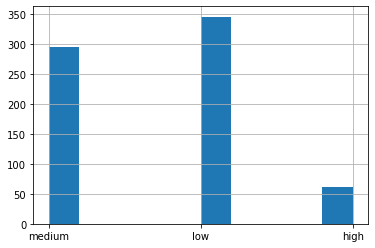

In [96]:
data_product_mng['salary'].hist()

In [97]:
data_randd = data_not_left.loc[data['department'] == 'RandD']

<AxesSubplot:>

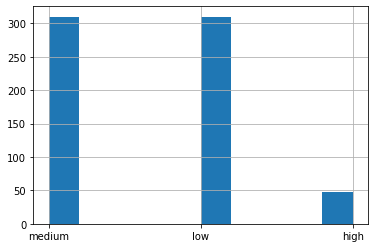

In [98]:
data_randd['salary'].hist()

In [99]:
data_marketing = data_not_left.loc[data['department'] == 'marketing']

<AxesSubplot:>

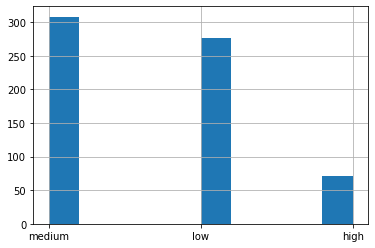

In [100]:
data_marketing['salary'].hist()

In [101]:
#7 задание (Для полноты картины стоит взять полный датафрейм и с уволившимися сотрудниками)

In [102]:
data_hours = data[['average_montly_hours', 'salary']]

In [103]:
#Среднее не подтверждает гипотезу 7 задания
data_hours.groupby(['salary']).mean()

,average_montly_hours
salary,
high,199.867421
low,200.996583
medium,201.338349


In [104]:
#Медиана тоже не подтверждает гипотезу 7 задания
data_hours.groupby(['salary']).median()

,average_montly_hours
salary,
high,199
low,199
medium,201


In [105]:
#Для полной проверки проведём t-тест
#Подготовим данные
A = data.loc[data['salary'] == 'high']
B = data.loc[data['salary'] == 'low']
A = A['average_montly_hours']
B = B['average_montly_hours']

t_value: -0.7288680398062308 _pvalue:  0.4661023478267259


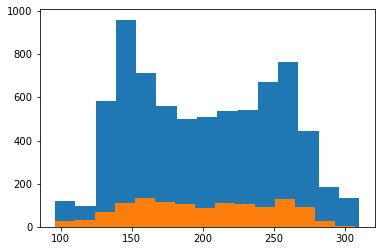

In [110]:
#Проведём t-test для проверки нашей гипотезы
#Нулевой гипотезой будем считать, что время проведённое на работе не отличается
t, p = stats.ttest_ind(A, B)
print('t_value:',t, '_pvalue: ',p)
plt.hist(B, bins=15);
plt.hist(A, bins=15);
# Очень высокий p-value оснований отвергать нулевую гипотезу нет
# Вывод: Гипотеза ложная

In [115]:
#8 Задание (датафрейм с не ушедшими сотрадниками был создан ранее)
data_left = data.loc[data['left'] == 1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [125]:
# для начала будем расчитывать для работающих сотрудников
data_not_left_promotion = data_not_left.loc[data['promotion_last_5years'] == 1]
share = len(data_not_left) / len(data_not_left_promotion)
print('Доля сотрудников с повышением - {0}'.format(share))
print('Количество сотрудников всего', len(data_not_left))
print('Количество сотрудников с повышением', len(data_not_left_promotion))

Доля сотрудников с повышением - 38.093333333333334
Количество сотрудников всего 11428
Количество сотрудников с повышением 300


In [126]:
#Средняя степень удовлетворённости
data_not_left['satisfaction_level'].mean()

0.666809590479516

In [127]:
#Среднее количество проектов
data_not_left['number_project'].mean()

3.786664333216661

In [128]:
#Для ушедших сотрудников
data_left_promotion = data_left.loc[data['promotion_last_5years'] == 1]
share = len(data_left) / len(data_left_promotion)
print('Доля сотрудников с повышением - {0}'.format(share))
print('Количество сотрудников всего', len(data_left))
print('Количество сотрудников с повышением', len(data_left_promotion))

Доля сотрудников с повышением - 187.94736842105263
Количество сотрудников всего 3571
Количество сотрудников с повышением 19


In [129]:
#Средняя степень удовлетворённости
data_left['satisfaction_level'].mean()

0.44009801176140917

In [130]:
#Среднее количество проектов
data_left['number_project'].mean()

3.8555026603192384

In [135]:
#9 Задание
#Создадим новый датафрейм удовлетворяющий условиям задания
data_9_task = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]

In [155]:
data_9_task_class = data['left'].to_numpy()
data_9_task_class

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [166]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_9_task, data_9_task_class, test_size=0.2)

In [167]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [168]:
lda = LinearDiscriminantAnalysis()

In [169]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [170]:
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [171]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [172]:
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,1
...,...,...
2995,0,0
2996,0,0
2997,0,0
2998,0,0


In [173]:
from sklearn.metrics import accuracy_score

In [174]:
#Точность предсказаний
accuracy_score(y_test, lda.predict(X_test))

0.756

In [165]:
lda.coef_

array([[-4.50794885e+00,  7.22834038e-01, -2.49455196e-01,
         4.35568517e-03,  2.17871823e-01, -1.10638892e+00,
        -1.09636163e+00]])